In [75]:
import librosa
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import urllib.parse
import pymysql
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [76]:

# MySQL database connection details
username = 'root'
pw = 'kaiser123'
host = '127.0.0.1'
database = 'FMA_DB'

# Create a database engine
connection_string = 'mysql+pymysql://root:'+ pw +'@localhost:3306/'
engine = create_engine(connection_string)

# Load and clean CSV files from the FMA DATA SOURCE 
def load_and_clean_csv(file_path):
    df = pd.read_csv(file_path)
    return df

tracks_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/raw_tracks.csv')
genres_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/raw_genres.csv')
artists_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/raw_artists.csv')
albums_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/raw_albums.csv')
features_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/features.csv')
echonest_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/FMA METADATA/fma_metadata/raw_echonest.csv')




# Cleaning the data seems to be the idea, in order to have a more concise and clear data base to use when it comes to the analysis 
# this way i can use the data sets in conjunction with others and get rid of redundancies 
# the process is as follows, get rid of redundant collumns that would not really add any information to the data analysis portion in the tables 

/var/folders/7v/1k3tf50152b3pjvsxtnpb34w0000gp/T/ipykernel_5343/2250193688.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [77]:
# # GTZAN database  intergration 
# features_df = load_and_clean_csv('/Users/nabilomondi/Downloads/Final Project IRONHACK/GTZAN DATA/Data/features_3_sec.csv')



In [78]:
tracks_df.shape

(109727, 39)

In [79]:
albums_df.shape

(15234, 19)

In [80]:
import ast

# Function to extract genre_id from the list of dictionary strings
def extract_genre_id(genre_str):
    try:
        genre_list = ast.literal_eval(genre_str)
        if isinstance(genre_list, list) and genre_list:  # Check if it is a list and not empty
            return int(genre_list[0]['genre_id'])  # Extract genre_id from the first dictionary
        return None
    except (ValueError, SyntaxError, KeyError):
        return None

# Apply the function to the 'track_genres' column and create a new 'genre_id' column
tracks_df['genre_id'] = tracks_df['track_genres'].apply(extract_genre_id)

# Display the DataFrame to verify the new column
print(tracks_df[['track_genres', 'genre_id']].head())



                                        track_genres  genre_id
0  [{'genre_id': '21', 'genre_title': 'Hip-Hop', ...      21.0
1  [{'genre_id': '21', 'genre_title': 'Hip-Hop', ...      21.0
2  [{'genre_id': '21', 'genre_title': 'Hip-Hop', ...      21.0
3  [{'genre_id': '10', 'genre_title': 'Pop', 'gen...      10.0
4  [{'genre_id': '76', 'genre_title': 'Experiment...      76.0


In [81]:
artists_df.shape

(16916, 25)

In [82]:
genres_df.shape

(164, 5)

In [83]:
tracks_df.isnull().sum()

track_id                         0
album_id                      1041
album_title                   1041
album_url                     1041
artist_id                        0
artist_name                      0
artist_url                       0
artist_website               27897
license_image_file             336
license_image_file_large       824
license_parent_id            26036
license_title                   87
license_url                     88
tags                             0
track_bit_rate                 130
track_comments                   0
track_composer              105937
track_copyright_c           108029
track_copyright_p           108801
track_date_created               0
track_date_recorded         103283
track_disc_number                0
track_duration                   0
track_explicit              106248
track_explicit_notes        109666
track_favorites                  0
track_file                       7
track_genres                  2609
track_image_file    

In [84]:
# dataframes loaded from FMA dataset 
tracks_df
artists_df
albums_df
genres_df


,genre_id,genre_color,genre_handle,genre_parent_id,genre_title
0,1,#006666,Avant-Garde,38.0,Avant-Garde
1,2,#CC3300,International,NaN,International
2,3,#000099,Blues,NaN,Blues
3,4,#990099,Jazz,NaN,Jazz
4,5,#8A8A65,Classical,NaN,Classical
...,...,...,...,...,...
159,1032,#CC3300,Turkish,102.0,Turkish
160,1060,#CC3300,tango,46.0,Tango
161,1156,#CC3300,Fado,130.0,Fado
162,1193,#D4A017,Christmas,763.0,Christmas


In [85]:

features_df.shape


(106577, 519)

In [86]:
features_df.head()

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02


In [87]:
tracks_df.shape

(109727, 40)

In [88]:
artists_df.shape

(16916, 25)

In [89]:
genres_df.shape

(164, 5)

In [90]:
albums_df.shape

(15234, 19)

In [91]:
test=tracks_df.dropna()

In [92]:
tracks_df.isna().sum()

track_id                         0
album_id                      1041
album_title                   1041
album_url                     1041
artist_id                        0
artist_name                      0
artist_url                       0
artist_website               27897
license_image_file             336
license_image_file_large       824
license_parent_id            26036
license_title                   87
license_url                     88
tags                             0
track_bit_rate                 130
track_comments                   0
track_composer              105937
track_copyright_c           108029
track_copyright_p           108801
track_date_created               0
track_date_recorded         103283
track_disc_number                0
track_duration                   0
track_explicit              106248
track_explicit_notes        109666
track_favorites                  0
track_file                       7
track_genres                  2609
track_image_file    

In [93]:
tracks_df['track_duration'].dtype



dtype('O')

In [94]:
tracks_df.dtypes

track_id                      int64
album_id                    float64
album_title                  object
album_url                    object
artist_id                     int64
artist_name                  object
artist_url                   object
artist_website               object
license_image_file           object
license_image_file_large     object
license_parent_id           float64
license_title                object
license_url                  object
tags                         object
track_bit_rate              float64
track_comments                int64
track_composer               object
track_copyright_c            object
track_copyright_p            object
track_date_created           object
track_date_recorded          object
track_disc_number             int64
track_duration               object
track_explicit               object
track_explicit_notes         object
track_favorites               int64
track_file                   object
track_genres                

In [95]:


# Convert columns to appropriate data types
tracks_df['track_id'] = tracks_df['track_id'].astype(int)
tracks_df['album_id'] = tracks_df['album_id'].fillna(-1).astype(int)
tracks_df['artist_id'] = tracks_df['artist_id'].astype(int)
tracks_df['license_parent_id'] = tracks_df['license_parent_id'].fillna(-1).astype(int)
tracks_df['track_bit_rate'] = tracks_df['track_bit_rate'].fillna(0).astype(int)
tracks_df['track_comments'] = tracks_df['track_comments'].astype(int)
tracks_df['track_disc_number'] = tracks_df['track_disc_number'].astype(int)
tracks_df['track_favorites'] = tracks_df['track_favorites'].astype(int)
tracks_df['track_instrumental'] = tracks_df['track_instrumental'].astype(int)
tracks_df['track_interest'] = tracks_df['track_interest'].astype(int)
tracks_df['track_listens'] = tracks_df['track_listens'].astype(int)
tracks_df['track_number'] = tracks_df['track_number'].astype(int)

# Convert date columns to datetime
tracks_df['track_date_created'] = pd.to_datetime(tracks_df['track_date_created'], errors='coerce')
tracks_df['track_date_recorded'] = pd.to_datetime(tracks_df['track_date_recorded'], errors='coerce')

# Replace null values in string columns with 'unknown' or appropriate values
string_columns = ['album_title', 'album_url', 'artist_name', 'artist_url', 'artist_website',
                  'license_image_file', 'license_image_file_large', 'license_title', 'license_url',
                  'tags', 'track_composer', 'track_copyright_c', 'track_copyright_p', 'track_explicit',
                  'track_explicit_notes', 'track_file', 'track_genres', 'track_image_file', 'track_information',
                  'track_language_code', 'track_lyricist', 'track_publisher', 'track_title', 'track_url']

for col in string_columns:
    tracks_df[col] = tracks_df[col].fillna('unknown')

# Handle track_duration (assuming it is in 'MM:SS' format)
def convert_duration(duration):
    if pd.isna(duration) or duration == 'unknown':
        return np.nan
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes + seconds / 60  # Convert to total minutes
    except ValueError:
        return np.nan

tracks_df['track_duration'] = tracks_df['track_duration'].apply(convert_duration).fillna(0).astype(float)

# Display the modified DataFrame
print(tracks_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109727 entries, 0 to 109726
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   track_id                  109727 non-null  int64         
 1   album_id                  109727 non-null  int64         
 2   album_title               109727 non-null  object        
 3   album_url                 109727 non-null  object        
 4   artist_id                 109727 non-null  int64         
 5   artist_name               109727 non-null  object        
 6   artist_url                109727 non-null  object        
 7   artist_website            109727 non-null  object        
 8   license_image_file        109727 non-null  object        
 9   license_image_file_large  109727 non-null  object        
 10  license_parent_id         109727 non-null  int64         
 11  license_title             109727 non-null  object        
 12  li

In [96]:
genres_df.dtypes

genre_id             int64
genre_color         object
genre_handle        object
genre_parent_id    float64
genre_title         object
dtype: object

In [97]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genre_id         164 non-null    int64  
 1   genre_color      164 non-null    object 
 2   genre_handle     164 non-null    object 
 3   genre_parent_id  149 non-null    float64
 4   genre_title      164 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.5+ KB


In [98]:
albums_df.dtypes

album_id                int64
album_comments          int64
album_date_created     object
album_date_released    object
album_engineer         object
album_favorites         int64
album_handle           object
album_image_file       object
album_images           object
album_information      object
album_listens           int64
album_producer         object
album_title            object
album_tracks            int64
album_type             object
album_url              object
artist_name            object
artist_url             object
tags                   object
dtype: object

In [99]:
albums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15234 entries, 0 to 15233
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   album_id             15234 non-null  int64 
 1   album_comments       15234 non-null  int64 
 2   album_date_created   15234 non-null  object
 3   album_date_released  9743 non-null   object
 4   album_engineer       2393 non-null   object
 5   album_favorites      15234 non-null  int64 
 6   album_handle         15234 non-null  object
 7   album_image_file     15234 non-null  object
 8   album_images         15234 non-null  object
 9   album_information    12036 non-null  object
 10  album_listens        15234 non-null  int64 
 11  album_producer       2662 non-null   object
 12  album_title          15234 non-null  object
 13  album_tracks         15234 non-null  int64 
 14  album_type           14770 non-null  object
 15  album_url            15233 non-null  object
 16  arti

In [100]:
# Convert columns to appropriate data types
albums_df['album_id'] = albums_df['album_id'].astype(int)
albums_df['album_comments'] = albums_df['album_comments'].astype(int)
albums_df['album_favorites'] = albums_df['album_favorites'].astype(int)
albums_df['album_listens'] = albums_df['album_listens'].astype(int)
albums_df['album_tracks'] = albums_df['album_tracks'].astype(int)

# Convert date columns to datetime
albums_df['album_date_created'] = pd.to_datetime(albums_df['album_date_created'], errors='coerce')
albums_df['album_date_released'] = pd.to_datetime(albums_df['album_date_released'], errors='coerce')

# Replace null values in string columns with 'unknown' or appropriate values
string_columns = ['album_engineer', 'album_handle', 'album_image_file', 'album_images',
                  'album_information', 'album_producer', 'album_title', 'album_type',
                  'album_url', 'artist_name', 'artist_url', 'tags']

for col in string_columns:
    albums_df[col] = albums_df[col].fillna('unknown')

# Display the modified DataFrame
print(albums_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15234 entries, 0 to 15233
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   album_id             15234 non-null  int64         
 1   album_comments       15234 non-null  int64         
 2   album_date_created   15234 non-null  datetime64[ns]
 3   album_date_released  9743 non-null   datetime64[ns]
 4   album_engineer       15234 non-null  object        
 5   album_favorites      15234 non-null  int64         
 6   album_handle         15234 non-null  object        
 7   album_image_file     15234 non-null  object        
 8   album_images         15234 non-null  object        
 9   album_information    15234 non-null  object        
 10  album_listens        15234 non-null  int64         
 11  album_producer       15234 non-null  object        
 12  album_title          15234 non-null  object        
 13  album_tracks         15234 non-

In [101]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_id                 16916 non-null  int64  
 1   artist_active_year_begin  1419 non-null   float64
 2   artist_active_year_end    470 non-null    float64
 3   artist_associated_labels  925 non-null    object 
 4   artist_bio                6644 non-null   object 
 5   artist_comments           16916 non-null  int64  
 6   artist_contact            1456 non-null   object 
 7   artist_date_created       16916 non-null  object 
 8   artist_donation_url       1584 non-null   object 
 9   artist_favorites          16916 non-null  int64  
 10  artist_flattr_name        72 non-null     object 
 11  artist_handle             16916 non-null  object 
 12  artist_image_file         16916 non-null  object 
 13  artist_images             7798 non-null   object 
 14  artist

In [102]:
# Convert columns to appropriate data types
artists_df['artist_id'] = artists_df['artist_id'].astype(int)
artists_df['artist_comments'] = artists_df['artist_comments'].astype(int)
artists_df['artist_favorites'] = artists_df['artist_favorites'].astype(int)

# Convert float columns and handle nulls
float_columns = ['artist_active_year_begin', 'artist_active_year_end', 'artist_latitude', 'artist_longitude']
for col in float_columns:
    artists_df[col] = artists_df[col].fillna(0).astype(float)

# Convert date columns to datetime
artists_df['artist_date_created'] = pd.to_datetime(artists_df['artist_date_created'], errors='coerce')

# Replace null values in string columns with 'unknown' or appropriate values
string_columns = ['artist_associated_labels', 'artist_bio', 'artist_contact', 'artist_donation_url',
                  'artist_flattr_name', 'artist_handle', 'artist_image_file', 'artist_images',
                  'artist_location', 'artist_members', 'artist_name', 'artist_paypal_name',
                  'artist_related_projects', 'artist_url', 'artist_website', 'artist_wikipedia_page', 'tags']

for col in string_columns:
    artists_df[col] = artists_df[col].fillna('unknown')

# Display the modified DataFrame
print(artists_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   artist_id                 16916 non-null  int64         
 1   artist_active_year_begin  16916 non-null  float64       
 2   artist_active_year_end    16916 non-null  float64       
 3   artist_associated_labels  16916 non-null  object        
 4   artist_bio                16916 non-null  object        
 5   artist_comments           16916 non-null  int64         
 6   artist_contact            16916 non-null  object        
 7   artist_date_created       16916 non-null  datetime64[ns]
 8   artist_donation_url       16916 non-null  object        
 9   artist_favorites          16916 non-null  int64         
 10  artist_flattr_name        16916 non-null  object        
 11  artist_handle             16916 non-null  object        
 12  artist_image_file 

In [103]:
echonest_df.shape

(14511, 250)

In [104]:
print(echonest_df.columns[:26])

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'album_date', 'album_name', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_name', 'release', 'artist_discovery_rank',
       'artist_familiarity_rank', 'artist_hotttnesss_rank',
       'song_currency_rank', 'song_hotttnesss_rank', 'artist_discovery',
       'artist_familiarity', 'artist_hotttnesss', 'song_currency',
       'song_hotttnesss'],
      dtype='object')


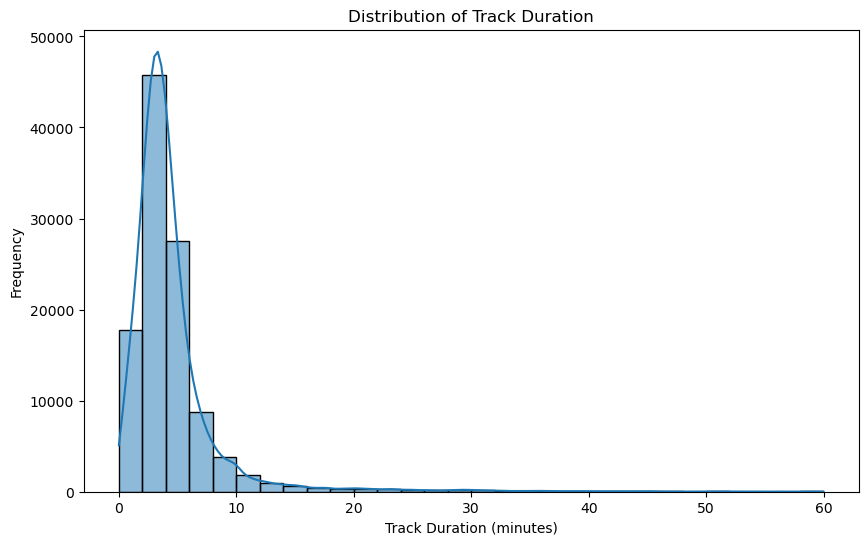

In [105]:

# Plot the distribution of track duration
plt.figure(figsize=(10, 6))
sns.histplot(tracks_df['track_duration'], bins=30, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Frequency')
plt.show()



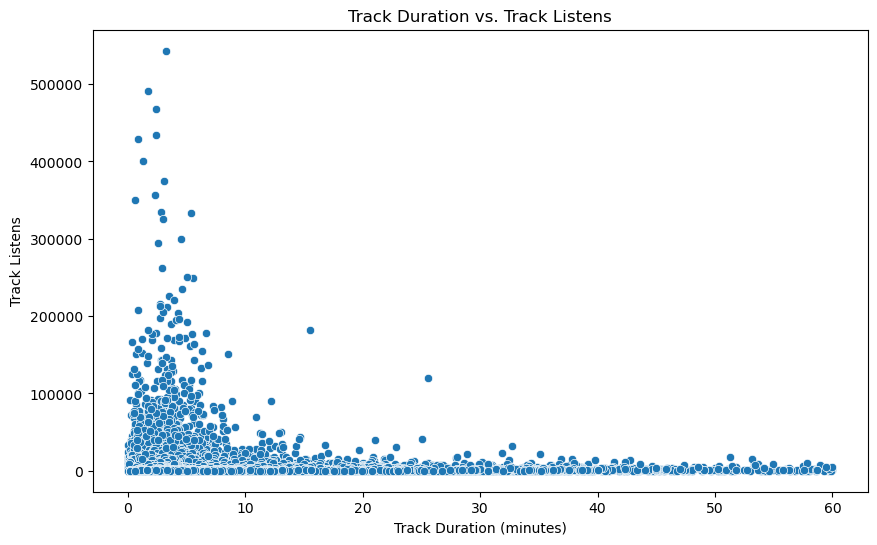

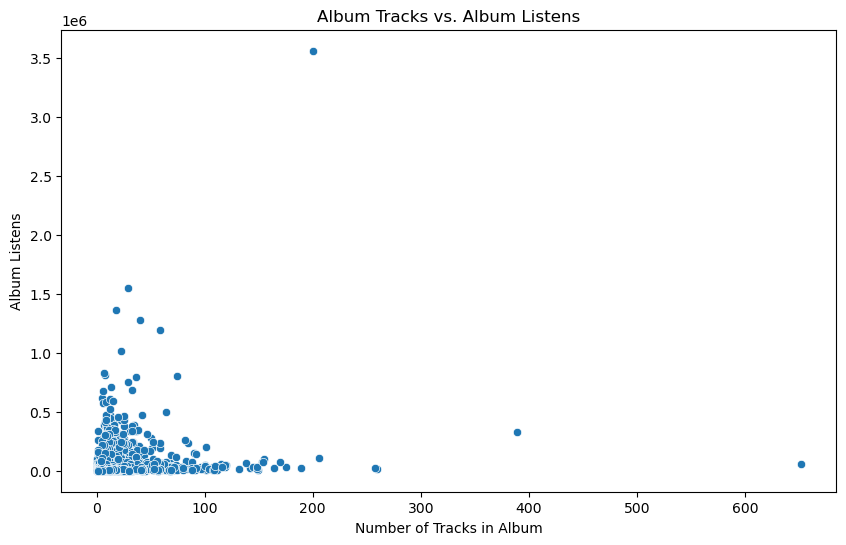

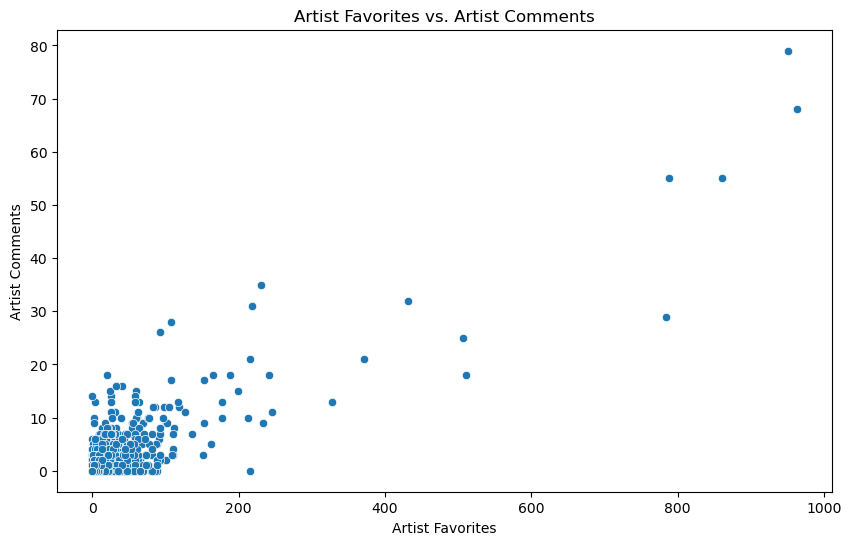

In [106]:
# Scatter plot of track duration vs. track listens
plt.figure(figsize=(10, 6))
sns.scatterplot(x='track_duration', y='track_listens', data=tracks_df)
plt.title('Track Duration vs. Track Listens')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Track Listens')
plt.show()

# Scatter plot of album tracks vs. album listens
plt.figure(figsize=(10, 6))
sns.scatterplot(x='album_tracks', y='album_listens', data=albums_df)
plt.title('Album Tracks vs. Album Listens')
plt.xlabel('Number of Tracks in Album')
plt.ylabel('Album Listens')
plt.show()

# Scatter plot of artist favorites vs. artist comments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_favorites', y='artist_comments', data=artists_df)
plt.title('Artist Favorites vs. Artist Comments')
plt.xlabel('Artist Favorites')
plt.ylabel('Artist Comments')
plt.show()





In [107]:
# Group by genre and compute mean track duration
genre_track_duration = tracks_df.groupby('genre_id')['track_duration'].mean().sort_values()
print("Mean Track Duration by Genre:")
print(genre_track_duration)

# Group by album type and compute mean album listens
album_type_listens = albums_df.groupby('album_type')['album_listens'].mean().sort_values()
print("\nMean Album Listens by Album Type:")
print(album_type_listens)

# Group by artist location and compute mean artist favorites
artist_location_favorites = artists_df.groupby('artist_location')['artist_favorites'].mean().sort_values()
print("\nMean Artist Favorites by Artist Location:")
print(artist_location_favorites)


Mean Track Duration by Genre:
genre_id
439.0     0.865608
428.0     1.162500
188.0     1.567901
374.0     1.850000
170.0     1.950000
           ...    
113.0    13.035714
43.0     15.901802
65.0     23.904321
378.0    28.363095
173.0    32.400000
Name: track_duration, Length: 149, dtype: float64

Mean Album Listens by Album Type:
album_type
Live Performance     4944.662864
Radio Program        6158.428048
Single Tracks        8484.230263
Album               17981.398779
unknown             20503.523707
Contest             23268.000000
Name: album_listens, dtype: float64

Mean Artist Favorites by Artist Location:
artist_location
Θεσσαλονίκη, Greece                            0.0
New York & Baltimore                           0.0
New York & Tokyo                               0.0
New York (at least all were at that time)      0.0
New York City, NY USA                          0.0
                                             ...  
45840                                        328.0
Portla

In [108]:

n = 9  # Number of columns you want to keep

# Select the first n columns and drop the rest
echonest_df_features = echonest_df.iloc[:, :n]

# Display the modified DataFrame
print(echonest_df.head())

echonest_df_features.columns

   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  album_date  ...       214        215  \
0     0.159310  165.922  0.576661         NaN  ... -1.992303   6.805694   
1     0.461818  126.957  0.269240         NaN  ... -1.582331   8.889308   
2     0.124595  100.260  0.621661         NaN  ... -2.288358  11.527109   
3     0.032985  111.562  0.963590  2008-03-11  ... -3.662988  21.508228   
4     0.525519  114.290  0.894072         NaN  ... -1.452696   2.356398   

        216       217       218      219       220       221  

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [109]:
# Display summary statistics for numerical columns
print("Tracks DataFrame Summary Statistics:")
print(tracks_df.describe())
print("\nAlbums DataFrame Summary Statistics:")
print(albums_df.describe())
print("\nArtists DataFrame Summary Statistics:")
print(artists_df.describe())
print("\nEchonest DataFrame Summary Statistics:")
print(echonest_df.describe())


Tracks DataFrame Summary Statistics:
            track_id       album_id      artist_id  license_parent_id  \
count  109727.000000  109727.000000  109727.000000      109727.000000   
mean    79023.455904   12768.307773   11958.307609           3.742898   
min         2.000000      -1.000000       1.000000          -1.000000   
25%     40062.500000    7700.500000    6333.000000           2.000000   
50%     77419.000000   13300.000000   11905.000000           5.000000   
75%    119344.500000   18192.500000   17999.000000           6.000000   
max    155320.000000   22940.000000   24357.000000          10.000000   
std     44804.546522    6303.366873    6903.666587           2.898677   

       track_bit_rate  track_comments             track_date_created  \
count   109727.000000   109727.000000                         109727   
mean    263440.661387        0.031423  2013-02-07 22:59:13.669434112   
min          0.000000        0.000000            2008-11-25 17:49:06   
25%     192000.00

In [110]:
# Display summary statistics for numerical columns
print("Tracks DataFrame Summary Statistics:")
print(tracks_df.describe())
print("\nAlbums DataFrame Summary Statistics:")
print(albums_df.describe())
print("\nArtists DataFrame Summary Statistics:")
print(artists_df.describe())
print("\nEchonest DataFrame Summary Statistics:")
print(echonest_df.describe())


Tracks DataFrame Summary Statistics:
            track_id       album_id      artist_id  license_parent_id  \
count  109727.000000  109727.000000  109727.000000      109727.000000   
mean    79023.455904   12768.307773   11958.307609           3.742898   
min         2.000000      -1.000000       1.000000          -1.000000   
25%     40062.500000    7700.500000    6333.000000           2.000000   
50%     77419.000000   13300.000000   11905.000000           5.000000   
75%    119344.500000   18192.500000   17999.000000           6.000000   
max    155320.000000   22940.000000   24357.000000          10.000000   
std     44804.546522    6303.366873    6903.666587           2.898677   

       track_bit_rate  track_comments             track_date_created  \
count   109727.000000   109727.000000                         109727   
mean    263440.661387        0.031423  2013-02-07 22:59:13.669434112   
min          0.000000        0.000000            2008-11-25 17:49:06   
25%     192000.00

In [111]:
echonest_df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14511 entries, 0 to 14510
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          14511 non-null  int64  
 1   acousticness      14511 non-null  float64
 2   danceability      14485 non-null  float64
 3   energy            14511 non-null  float64
 4   instrumentalness  14511 non-null  float64
 5   liveness          14511 non-null  float64
 6   speechiness       14308 non-null  float64
 7   tempo             14511 non-null  float64
 8   valence           14483 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1020.4 KB


In [134]:
echonest_df_features[24:]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
24,177,0.754275,0.209113,0.579959,0.736865,0.112165,0.073350,95.932,0.083330
25,178,0.995553,0.186146,0.413054,0.955137,0.111716,0.040893,61.316,0.252819
26,179,0.958873,0.274609,0.989482,0.919362,0.546516,0.185316,84.173,0.033208
27,189,0.993670,0.622578,0.216907,0.972870,0.110989,0.029924,92.124,0.039641
28,190,0.990629,0.500753,0.371230,0.102838,0.218810,0.032529,100.919,0.251232
...,...,...,...,...,...,...,...,...,...
14506,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
14507,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
14508,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
14509,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


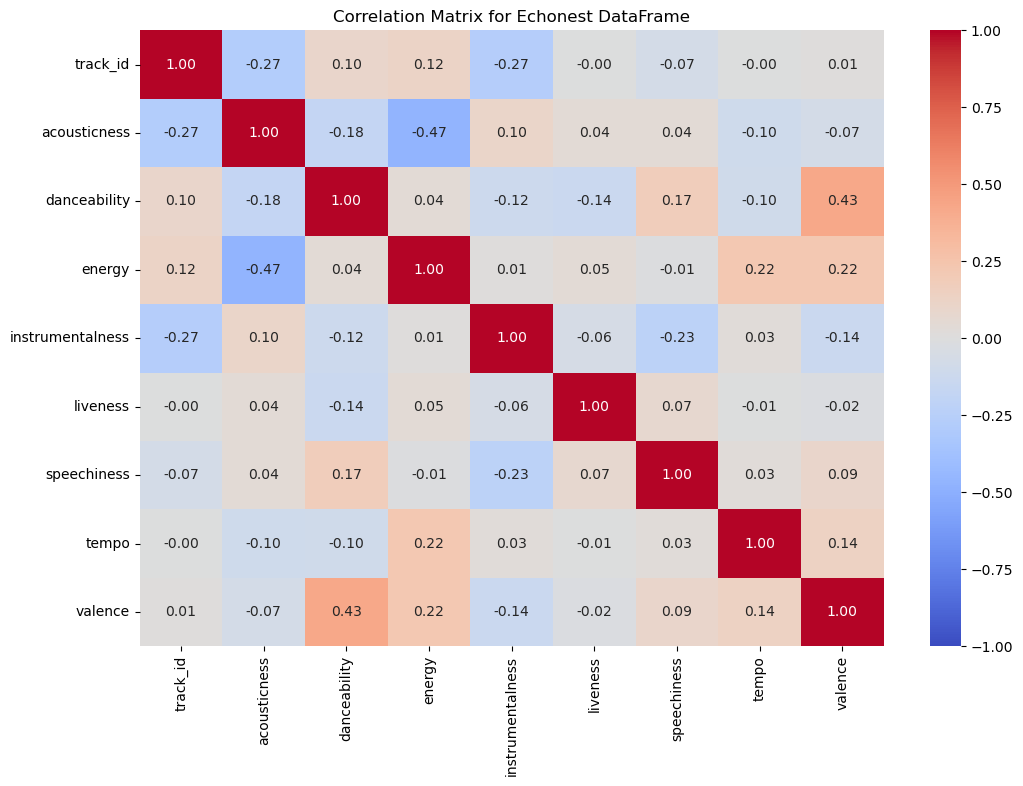

In [112]:


# Compute the correlation matrix for numerical columns in the echonest DataFrame
plt.figure(figsize=(12, 8))
corr_matrix = echonest_df_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1,cmap='coolwarm')
plt.title('Correlation Matrix for Echonest DataFrame')
plt.show()


In [113]:
n = 26  # Number of columns you want to keep

# Select the first n columns and drop the rest
echonest_df = echonest_df.iloc[:, :n]

# Display the modified DataFrame
print(echonest_df.head())

echonest_df.columns

   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  album_date  ... artist_discovery_rank  \
0     0.159310  165.922  0.576661         NaN  ...                   NaN   
1     0.461818  126.957  0.269240         NaN  ...                   NaN   
2     0.124595  100.260  0.621661         NaN  ...                   NaN   
3     0.032985  111.562  0.963590  2008-03-11  ...                2635.0   
4     0.525519  114.290  0.894072         NaN  ...                   NaN   

   artist_familiarity_rank artist_hotttnesss_rank  song_

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'album_date', 'album_name', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_name', 'release', 'artist_discovery_rank',
       'artist_familiarity_rank', 'artist_hotttnesss_rank',
       'song_currency_rank', 'song_hotttnesss_rank', 'artist_discovery',
       'artist_familiarity', 'artist_hotttnesss', 'song_currency',
       'song_hotttnesss'],
      dtype='object')

In [114]:
echonest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14511 entries, 0 to 14510
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track_id                 14511 non-null  int64  
 1   acousticness             14511 non-null  float64
 2   danceability             14485 non-null  float64
 3   energy                   14511 non-null  float64
 4   instrumentalness         14511 non-null  float64
 5   liveness                 14511 non-null  float64
 6   speechiness              14308 non-null  float64
 7   tempo                    14511 non-null  float64
 8   valence                  14483 non-null  float64
 9   album_date               2878 non-null   object 
 10  album_name               3034 non-null   object 
 11  artist_latitude          10819 non-null  float64
 12  artist_location          10819 non-null  object 
 13  artist_longitude         10819 non-null  float64
 14  artist_name           

In [126]:

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# For remaining columns with few missing values, fill with mean (for numerical) or mode (for categorical)
for col in echonest_df.columns:
    if echonest_df[col].dtype == 'object':
        echonest_df[col].fillna(echonest_df[col].mode()[0], inplace=True)
    else:
        echonest_df[col].fillna(echonest_df[col].mean(), inplace=True)

# 2. Data Type Conversions

# Convert album_date to datetime if it's retained after missing value handling
if 'album_date' in echonest_df.columns:
    echonest_df['album_date'] = pd.to_datetime(echonest_df['album_date'], errors='coerce')

# Ensure correct data types for numerical columns excluding 'track_id'
numerical_cols = echonest_df.select_dtypes(include=['float64', 'int64']).columns.difference(['track_id'])
echonest_df[numerical_cols] = echonest_df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# 3. Normalization/Standardization


# 4. Deduplication

# Drop duplicate rows
echonest_df.drop_duplicates(inplace=True)

# 5. Outlier Detection and Treatment

# Save the cleaned dataframe
echonest_df.to_csv('cleaned_echonest_data.csv', index=False)

# Display the first few rows of the cleaned dataframe
echonest_df.head()


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,2008-01-01 00:00:00.000000000,...,198478.905896,130800.992257,214535.465594,2.899380e+06,2.289295e+06,0.388990,0.386740,0.406370,0.000000,0.000000
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,2008-01-01 00:00:00.000000000,...,198478.905896,130800.992257,214535.465594,2.899380e+06,2.289295e+06,0.388990,0.386740,0.406370,0.000000,0.000000
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,2008-01-01 00:00:00.000000000,...,198478.905896,130800.992257,214535.465594,2.899380e+06,2.289295e+06,0.388990,0.386740,0.406370,0.000000,0.000000
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2007-12-04 00:53:47.586206976,...,2635.000000,2544.000000,397.000000,1.156910e+05,6.760900e+04,0.557339,0.614272,0.798387,0.005158,0.354516
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,2008-01-01 00:00:00.000000000,...,198478.905896,130800.992257,214535.465594,2.899380e+06,2.289295e+06,0.388990,0.386740,0.406370,0.000000,0.000000


In [116]:
echonest_df.shape

(14511, 26)

In [117]:
tracks_df.drop_duplicates(inplace=True)

In [118]:
genres_df.duplicated().sum()

0

In [119]:
features_df.duplicated().sum()

0

In [120]:
albums_df.duplicated().sum()

0

In [121]:
artists_df.duplicated().sum()

0

In [122]:
features_df.head()

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02


In [124]:
# """# SEND the following tables to the FMA_reworked schema in MySQL so as to have a base  line for the EDA and project requirements """
# tracks_df.to_sql(name='track', con=engine, schema='FMA_reworked', index=False, if_exists='replace')
# genres_df.to_sql(name='genre', con=engine, schema='FMA_reworked', index=False, if_exists='replace')
# artists_df.to_sql(name='artist', con=engine, schema='FMA_reworked', index=False, if_exists='replace')
# albums_df.to_sql(name='album', con=engine, schema='FMA_reworked', index=False, if_exists='replace')
# echonest_df.to_sql(name='echonest',con=engine,schema='FMA_reworked',index=False,if_exists='replace')
# features_df.to_sql(name='echonest',con=engine,schema='FMA_reworked',index=False,if_exists='replace')

In [125]:
metadata_rows.columns

Index(['feature', 'chroma_cens', 'chroma_cens.1', 'chroma_cens.2',
       'chroma_cens.3', 'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6',
       'chroma_cens.7', 'chroma_cens.8',
       ...
       'tonnetz.39', 'tonnetz.40', 'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2',
       'zcr.3', 'zcr.4', 'zcr.5', 'zcr.6'],
      dtype='object', length=519)

In [135]:
echonest_df_features.pyplot

AttributeError: 'DataFrame' object has no attribute 'pyplot'